<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/esercizioCentralLimitTheorem23032021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2

- GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

- Describe the behavior you see in the plots in terms of the law of large numbers.

- PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing Extra Credit: FIT a gaussian to the distribution of means


In [ ]:
from __future__ import print_function

import pylab as pl
from scipy.optimize import curve_fit, minimize

import seaborn  #pacchetto per creare grafici
seaborn.set_style("darkgrid")

In [ ]:
distribution = ['pois']     #SCEGLIAMO DI USARE LA DISTRIBUZIONE DI POISSON
                            #distribution è una lista con 1 elemento

mymean = 100      #E SCELGO DI CREARE UNA DISTRIBUZIONE CON UNA MEDIA DI 100

#Una POISSONIANA esprime le probabilità per il numero di eventi che si verificano 
#successivamente ed indipendentemente in un dato intervallo di tempo, sapendo 
#che mediamente se ne verifica un numero λ. 

#Quindi ho scelto che nel mio arco di tempo si verificano in media 100 eventi.

In [ ]:
#ABBIAMO CONTROLLATO DA https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
#com'è fatta la funzione poisson e di che input ha bisogno. Perciò scopriamo che
#poisson takes as λ shape parameter
#e quindi definiamo i gradi di liberà come 
df=mymean

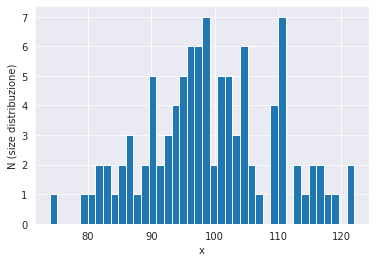

In [ ]:
 #CREIAMO un dizionario che contenga tutte le distribuzioni che vogliamo esaminare
 #nell'esercizio. In questo modo si posso esaminare comodamente le distribuzioni
 #attraverso il nome che gli diamo nel dizionario. Iniziamo riempendo il dizionario con
 #la distribuzione di poisson che abbiamo scelto.
 
import numpy as np
np.random.seed(152) #scegliamo il seme per generare i numeri casuali, con un numero
                    #qualsiasi (ogni numero collassa in un seme corrispondente). 
                    #Per il principio di riproducibilità dobbiamo per forza indicare
                    #il seme utilizzato.

md = {}  #ho creato un dizionario vuoto di nome md

#per dubbi sui dizionari https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python

#Add a value to the dictionary: #the syntax is: mydict[key] = "value"
md['pois'] = np.random.poisson(df, size = 100)

#in questo modo md contiene un oggetto chiamato pois che è un array di valori

pl.hist(md['pois'], bins = 40) #bins sono il nuemero di colonne che voglio nel grafico
pl.ylabel('N (size distribuzione)')
pl.xlabel('x');

**Figure** 1: Poisson distribution of a sample of size 100, for a Chi square distribution with 100 degrees of freedom.

In [ ]:
#A QUESTO PUNTO POSSIAMO CALCOALRE LA MEDIA E LA DEV STANDARD, PERCHE' LA MEDIA SERVE 
#ALLA FINE PER PLOTTARE LA DISTRIBUZIONE DELLE MEDIE DI N DISTRIBUZIONI DI POISSON.

print("Media distribuzione di Poisson: %.2f, STD DEV: %.2f" %(md['pois'].mean(), md['pois'].std()))

Media distribuzione di Poisson: 99.13, STD DEV: 10.09


In [ ]:
#COSTRUIAMO 100 DISTRIBUZIONI DI POISSON: Per la legge dei grandi numeri, prendiamo
#poche distribuzioni con un sample grande e molte dsitribuzioni con un sample piccolo.
#Questo perchè tante distribuzioni piccole mi danno il valore vero, sull'intera popolazione.
#Per fare ciò creiamo un vettore contenente le varie size, così:
#Ricordiamo che (N>10 & N<2000)

mysize = (2000 / (np.array(range(1,100)))).astype(int)

#astype(int) serve per prendere solo la parte intera di ogni entrata del vettore mysize
#il vettore mysize conterrà 100 (in realtà 99) valori interi che rappresentano le size
#delle varie distribuzioni che voglio creare.
print("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


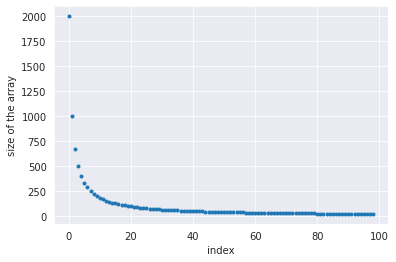

In [ ]:
pl.plot(mysize, '.')  #controllo che effettivamente ho preso poche size grandi
                      #e molte size piccole. E dopo utilizzo mysize per costruire 
                      #distribuzioni di size (ovvero numero di elementi di ogni 
                      #distribuzione) pari ad ogni elemento di questo vettore.
pl.xlabel("index")
pl.ylabel("size of the array");

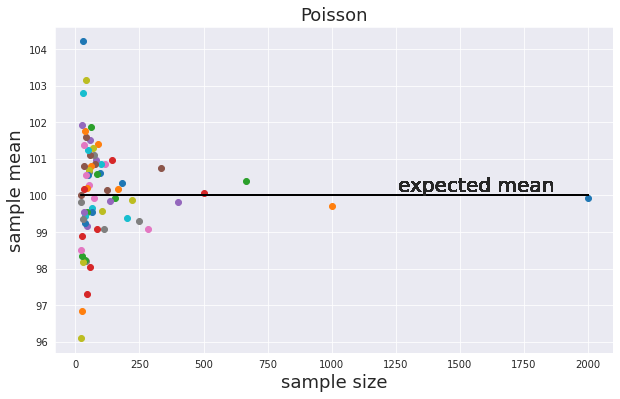

In [ ]:
#ADESSO DEVO COSTRUIRE 100 SAMPLE DALLA DISTRIBUZIONE DI POISSON, OGNUNO CON NUMERO DI ELEMENTI CHE
#PRENDO DAL VETTORE MYSIZE PER RISPETTARE LA LEGGE DEI GRANDI NUMERI.
#PER COMODITÀ REINIZIALIZZO IL DIZIONARIO

md['pois'] = {} 

#riempio il dizionario con 100 distribuzioni di poisson di dize diverse

for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n) #n è il valore di ogni entrata di
                                                     #misize

#adesso mi salvo le medie di ogni distribuzione
md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
  if not type(nn) == str:
    md['pois']['means'][nn] = md['pois'][nn].mean() #prendo la media della nn-esima
                                                    #distribuzione che ho creato
    #e poi la plotto
    axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
    axpois_mu_n.set_xlabel('sample size', fontsize=18)
    axpois_mu_n.set_ylabel('sample mean', fontsize=18)
    axpois_mu_n.set_title('Poisson', fontsize=18)
    axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 2: [describe what you see and how it relates to the law of large numbers]

GRADING: Your notebook must:

- generate the distributions, correctly generated for each of the 5 ditributions, all with same mean.

- display all plots: a scatter plot per distribution and a histogram of all distributions, usual rules for plotting applying: visible and readable axes, title, legend, caption.

- each plot must have a caption which describes the plot in terms of Central Limit Theorem